In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from functools import reduce
from sklearn import preprocessing
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor


In [3]:
import pickle

In [4]:
df_21 = pd.read_csv('Archivos/archivo21.csv')
df_21

,Unnamed: 0,Fecha,Temperatura_Media,Precipitaciones,Humedad_Relativa,Radiación_Solar,Velocidad_Viento
0,0,2021-02-01,11.3,0.00,73.0,132.0,3.2
1,1,2021-02-02,9.8,0.00,91.0,49.0,2.3
2,2,2021-02-03,10.0,0.00,88.0,49.0,1.4
3,3,2021-02-04,10.7,0.00,85.0,75.0,1.5
4,4,2021-02-05,11.7,0.13,75.0,124.0,1.6
...,...,...,...,...,...,...,...
360,360,2021-12-29,8.7,0.00,90.0,81.0,0.7
361,361,2021-12-30,8.1,0.00,79.0,99.0,0.6
362,362,2021-12-30,8.1,0.00,85.0,99.0,0.6
363,363,2021-12-31,8.3,0.00,77.0,101.0,0.7


In [5]:
df_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         365 non-null    int64  
 1   Fecha              365 non-null    object 
 2   Temperatura_Media  365 non-null    float64
 3   Precipitaciones    365 non-null    float64
 4   Humedad_Relativa   365 non-null    float64
 5   Radiación_Solar    365 non-null    float64
 6   Velocidad_Viento   365 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 20.1+ KB


In [6]:
df_21.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
df_21["Fecha"] = pd.to_datetime(df_21["Fecha"])
df_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Fecha              365 non-null    datetime64[ns]
 1   Temperatura_Media  365 non-null    float64       
 2   Precipitaciones    365 non-null    float64       
 3   Humedad_Relativa   365 non-null    float64       
 4   Radiación_Solar    365 non-null    float64       
 5   Velocidad_Viento   365 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 17.2 KB


In [8]:
df_21_dup = df_21.duplicated().any()
df_21_dup

np.True_

In [9]:
df_21_dup = df_21[df_21.duplicated(keep=False)]
df_21_dup

,Fecha,Temperatura_Media,Precipitaciones,Humedad_Relativa,Radiación_Solar,Velocidad_Viento
347,2021-12-23,8.3,0.1,94.0,50.0,1.0
348,2021-12-23,8.3,0.1,94.0,50.0,1.0


In [10]:
df_21_dup = df_21.drop_duplicates()
df_21_dup

,Fecha,Temperatura_Media,Precipitaciones,Humedad_Relativa,Radiación_Solar,Velocidad_Viento
0,2021-02-01,11.3,0.00,73.0,132.0,3.2
1,2021-02-02,9.8,0.00,91.0,49.0,2.3
2,2021-02-03,10.0,0.00,88.0,49.0,1.4
3,2021-02-04,10.7,0.00,85.0,75.0,1.5
4,2021-02-05,11.7,0.13,75.0,124.0,1.6
...,...,...,...,...,...,...
360,2021-12-29,8.7,0.00,90.0,81.0,0.7
361,2021-12-30,8.1,0.00,79.0,99.0,0.6
362,2021-12-30,8.1,0.00,85.0,99.0,0.6
363,2021-12-31,8.3,0.00,77.0,101.0,0.7


In [11]:
df_21_dup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 0 to 364
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Fecha              364 non-null    datetime64[ns]
 1   Temperatura_Media  364 non-null    float64       
 2   Precipitaciones    364 non-null    float64       
 3   Humedad_Relativa   364 non-null    float64       
 4   Radiación_Solar    364 non-null    float64       
 5   Velocidad_Viento   364 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 19.9 KB


In [12]:
df_22 = pd.read_csv('Archivos/archivo22.csv')
df_22

,Unnamed: 0,Fecha,Temperatura_Media,Precipitaciones,Humedad_Relativa,Radiación_Solar,Velocidad_Viento
0,0,2022-01-01,8.2,0.00,73.0,97.0,0.5
1,1,2022-01-02,7.5,0.00,77.0,89.0,0.6
2,2,2022-01-03,7.7,0.00,84.0,91.0,0.8
3,3,2022-01-04,5.4,0.24,90.0,30.0,1.7
4,4,2022-01-05,5.9,0.15,76.0,80.0,1.8
...,...,...,...,...,...,...,...
360,360,2022-12-27,8.1,0.00,84.0,NaN,0.7
361,361,2022-12-28,7.3,0.00,85.0,NaN,1.1
362,362,2022-12-29,9.9,0.00,89.0,NaN,2.4
363,363,2022-12-30,11.1,0.00,76.0,NaN,2.8


In [13]:
df_22.drop(columns=['Unnamed: 0'], inplace=True)

In [14]:
df_22["Fecha"] = pd.to_datetime(df_22["Fecha"])
df_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Fecha              365 non-null    datetime64[ns]
 1   Temperatura_Media  365 non-null    float64       
 2   Precipitaciones    304 non-null    float64       
 3   Humedad_Relativa   364 non-null    float64       
 4   Radiación_Solar    334 non-null    float64       
 5   Velocidad_Viento   365 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 17.2 KB


In [15]:
df_22.duplicated().any()


np.False_

In [16]:
df_23 = pd.read_csv('Archivos/archivo23.csv')
df_23

,Unnamed: 0,Fecha,Temperatura_Media,Precipitaciones,Humedad_Relativa,Radiación_Solar,Velocidad_Viento
0,0,2023-02-01,4.1,0.0,67.0,138.0,0.9
1,1,2023-02-02,6.0,0.0,64.0,136.0,0.7
2,2,2023-02-03,5.9,0.0,60.0,141.0,0.7
3,3,2023-02-04,6.6,0.0,56.0,144.0,0.7
4,4,2023-02-05,7.1,0.0,47.0,148.0,0.8
...,...,...,...,...,...,...,...
360,360,2023-12-29,4.4,0.0,88.0,38.0,0.6
361,361,2023-12-30,5.6,0.0,66.0,95.0,0.7
362,362,2023-12-30,5.6,0.0,82.0,95.0,0.7
363,363,2023-12-31,6.7,0.0,68.0,56.0,1.8


In [17]:
df_23.drop(columns=['Unnamed: 0'], inplace=True)

In [18]:
df_23["Fecha"] = pd.to_datetime(df_22["Fecha"])
df_23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Fecha              365 non-null    datetime64[ns]
 1   Temperatura_Media  365 non-null    float64       
 2   Precipitaciones    365 non-null    float64       
 3   Humedad_Relativa   365 non-null    float64       
 4   Radiación_Solar    365 non-null    float64       
 5   Velocidad_Viento   365 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 17.2 KB


In [19]:
df_23.duplicated().any()

np.False_

In [20]:
df_24 = pd.read_csv('Archivos/archivo24.csv')
df_24

,Unnamed: 0,Fecha,Temperatura_Media,Precipitaciones,Humedad_Relativa,Radiación_Solar,Velocidad_Viento
0,0,2023-02-01,4.1,0.0,67.0,138.0,0.9
1,1,2023-02-02,6.0,0.0,64.0,136.0,0.7
2,2,2023-02-03,5.9,0.0,60.0,141.0,0.7
3,3,2023-02-04,6.6,0.0,56.0,144.0,0.7
4,4,2023-02-05,7.1,0.0,47.0,148.0,0.8
...,...,...,...,...,...,...,...
360,360,2023-12-29,4.4,0.0,88.0,38.0,0.6
361,361,2023-12-30,5.6,0.0,66.0,95.0,0.7
362,362,2023-12-30,5.6,0.0,82.0,95.0,0.7
363,363,2023-12-31,6.7,0.0,68.0,56.0,1.8


In [21]:
df_24.drop(columns=['Unnamed: 0'], inplace=True)

In [22]:
df_24["Fecha"] = pd.to_datetime(df_24["Fecha"])
df_24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Fecha              365 non-null    datetime64[ns]
 1   Temperatura_Media  365 non-null    float64       
 2   Precipitaciones    365 non-null    float64       
 3   Humedad_Relativa   365 non-null    float64       
 4   Radiación_Solar    365 non-null    float64       
 5   Velocidad_Viento   365 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 17.2 KB


In [23]:
df_24.duplicated().any()

np.False_

In [24]:
lista_años = [df_21_dup, df_22, df_23, df_24]

In [25]:
df_years = pd.concat(lista_años, ignore_index=True)
df_years

,Fecha,Temperatura_Media,Precipitaciones,Humedad_Relativa,Radiación_Solar,Velocidad_Viento
0,2021-02-01,11.3,0.00,73.0,132.0,3.2
1,2021-02-02,9.8,0.00,91.0,49.0,2.3
2,2021-02-03,10.0,0.00,88.0,49.0,1.4
3,2021-02-04,10.7,0.00,85.0,75.0,1.5
4,2021-02-05,11.7,0.13,75.0,124.0,1.6
...,...,...,...,...,...,...
1454,2023-12-29,4.4,0.00,88.0,38.0,0.6
1455,2023-12-30,5.6,0.00,66.0,95.0,0.7
1456,2023-12-30,5.6,0.00,82.0,95.0,0.7
1457,2023-12-31,6.7,0.00,68.0,56.0,1.8


In [26]:
df_years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Fecha              1459 non-null   datetime64[ns]
 1   Temperatura_Media  1459 non-null   float64       
 2   Precipitaciones    1398 non-null   float64       
 3   Humedad_Relativa   1458 non-null   float64       
 4   Radiación_Solar    1428 non-null   float64       
 5   Velocidad_Viento   1459 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 68.5 KB


In [27]:
df_v = pd.read_csv('Archivos/archivo_ventas.csv')
df_v

,Unnamed: 0,Fecha,Ventas
0,0,2021-01-13,54.00
1,1,2021-01-14,50.15
2,2,2021-01-15,75.50
3,3,2021-01-16,89.45
4,4,2021-01-17,205.55
...,...,...,...
1182,1182,2024-12-24,321.40
1183,1183,2024-12-27,184.40
1184,1184,2024-12-28,170.78
1185,1185,2024-12-29,248.40


In [28]:
df_v.drop(columns=['Unnamed: 0'], inplace=True)

In [29]:
df_v["Fecha"] = pd.to_datetime(df_v["Fecha"])
df_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   1187 non-null   datetime64[ns]
 1   Ventas  1187 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 18.7 KB


In [30]:
df_v.duplicated().any()

np.False_

In [31]:
df_v

,Fecha,Ventas
0,2021-01-13,54.00
1,2021-01-14,50.15
2,2021-01-15,75.50
3,2021-01-16,89.45
4,2021-01-17,205.55
...,...,...
1182,2024-12-24,321.40
1183,2024-12-27,184.40
1184,2024-12-28,170.78
1185,2024-12-29,248.40


In [32]:
df = pd.merge(df_years, df_v, on='Fecha', how='inner')
df.head(800)

,Fecha,Temperatura_Media,Precipitaciones,Humedad_Relativa,Radiación_Solar,Velocidad_Viento,Ventas
0,2021-02-01,11.3,0.00,73.0,132.0,3.2,76.55
1,2021-02-03,10.0,0.00,88.0,49.0,1.4,46.88
2,2021-02-04,10.7,0.00,85.0,75.0,1.5,100.06
3,2021-02-05,11.7,0.13,75.0,124.0,1.6,377.79
4,2021-02-06,8.7,0.05,91.0,60.0,1.4,292.16
...,...,...,...,...,...,...,...
795,2022-07-16,27.3,0.00,27.0,309.0,1.5,491.10
796,2022-07-17,27.1,0.00,29.0,307.0,1.6,706.95
797,2022-07-18,26.8,0.00,26.0,280.0,2.3,307.45
798,2022-07-19,28.2,0.00,31.0,299.0,1.5,477.65


In [33]:
# Guardar dataframe en csv
df.to_csv('archivoHelados.csv', index=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Fecha              1244 non-null   datetime64[ns]
 1   Temperatura_Media  1244 non-null   float64       
 2   Precipitaciones    1189 non-null   float64       
 3   Humedad_Relativa   1243 non-null   float64       
 4   Radiación_Solar    1222 non-null   float64       
 5   Velocidad_Viento   1244 non-null   float64       
 6   Ventas             1244 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 68.2 KB


In [35]:
df.describe()

,Fecha,Temperatura_Media,Precipitaciones,Humedad_Relativa,Radiación_Solar,Velocidad_Viento,Ventas
count,1244,1244.00000,1189.000000,1243.000000,1222.000000,1244.000000,1244.000000
mean,2022-07-12 21:36:27.781350400,16.28825,0.038311,58.423765,203.454330,1.491604,411.397452
min,2021-02-01 00:00:00,1.10000,0.000000,17.000000,13.000000,0.400000,24.900000
25%,2021-12-27 00:00:00,9.80000,0.000000,41.000000,108.000000,1.000000,175.332500
50%,2022-06-30 12:00:00,15.80000,0.000000,59.000000,206.000000,1.400000,354.170000
75%,2022-12-27 00:00:00,22.20000,0.000000,75.000000,293.000000,1.900000,564.007500
max,2023-12-28 00:00:00,33.80000,1.930000,100.000000,547.000000,4.000000,1884.600000
std,NaN,7.74774,0.153624,20.048877,99.360145,0.676550,287.140713


In [36]:
df['Precipitaciones'] = df['Precipitaciones'].fillna(0)
df['Humedad_Relativa'] = df['Humedad_Relativa'].fillna(df['Humedad_Relativa'].mean())
df['Radiación_Solar'] = df['Radiación_Solar'].fillna(df['Radiación_Solar'].mean())

In [37]:
df

,Fecha,Temperatura_Media,Precipitaciones,Humedad_Relativa,Radiación_Solar,Velocidad_Viento,Ventas
0,2021-02-01,11.3,0.00,73.0,132.0,3.2,76.55
1,2021-02-03,10.0,0.00,88.0,49.0,1.4,46.88
2,2021-02-04,10.7,0.00,85.0,75.0,1.5,100.06
3,2021-02-05,11.7,0.13,75.0,124.0,1.6,377.79
4,2021-02-06,8.7,0.05,91.0,60.0,1.4,292.16
...,...,...,...,...,...,...,...
1239,2023-12-26,3.0,0.00,86.0,100.0,0.6,104.95
1240,2023-12-27,3.2,0.00,62.0,101.0,0.6,91.64
1241,2023-12-27,3.2,0.00,82.0,101.0,0.6,91.64
1242,2023-12-28,2.6,0.00,57.0,54.0,0.5,154.51


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Fecha              1244 non-null   datetime64[ns]
 1   Temperatura_Media  1244 non-null   float64       
 2   Precipitaciones    1244 non-null   float64       
 3   Humedad_Relativa   1244 non-null   float64       
 4   Radiación_Solar    1244 non-null   float64       
 5   Velocidad_Viento   1244 non-null   float64       
 6   Ventas             1244 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 68.2 KB


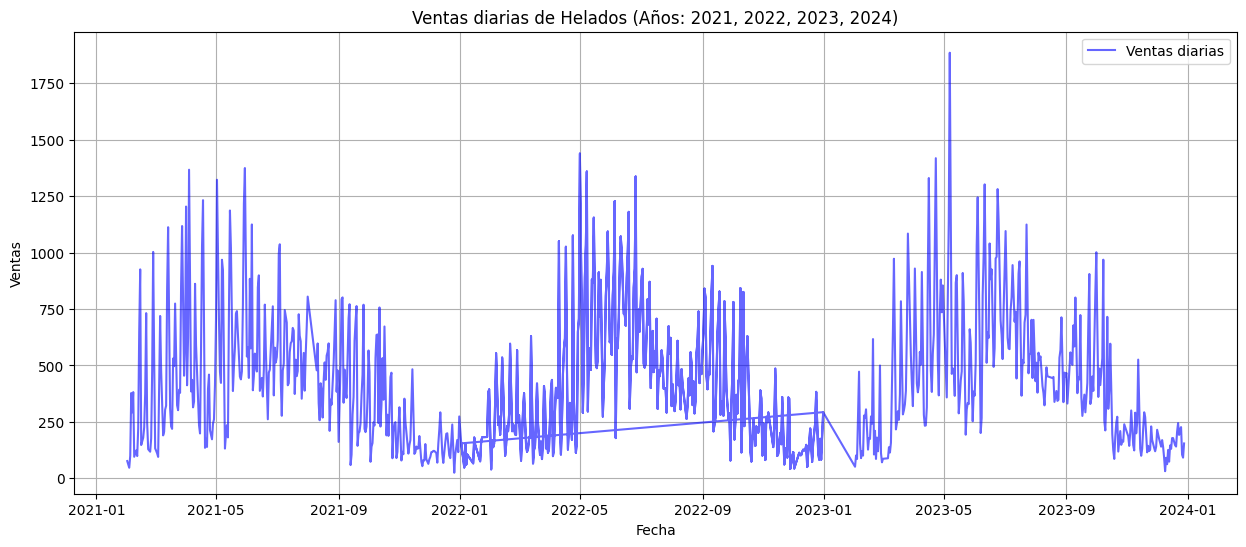

In [39]:
plt.figure(figsize=(15, 6))
plt.plot(df['Fecha'], df['Ventas'], label='Ventas diarias', color='blue', alpha=0.6)
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Ventas diarias de Helados (Años: 2021, 2022, 2023, 2024)')
plt.legend()
plt.grid(True)

C:\Users\rfg2m\AppData\Local\Temp\ipykernel_34692\2641877916.py:2: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  sns.boxplot(data=df[df.any(axis=1)])


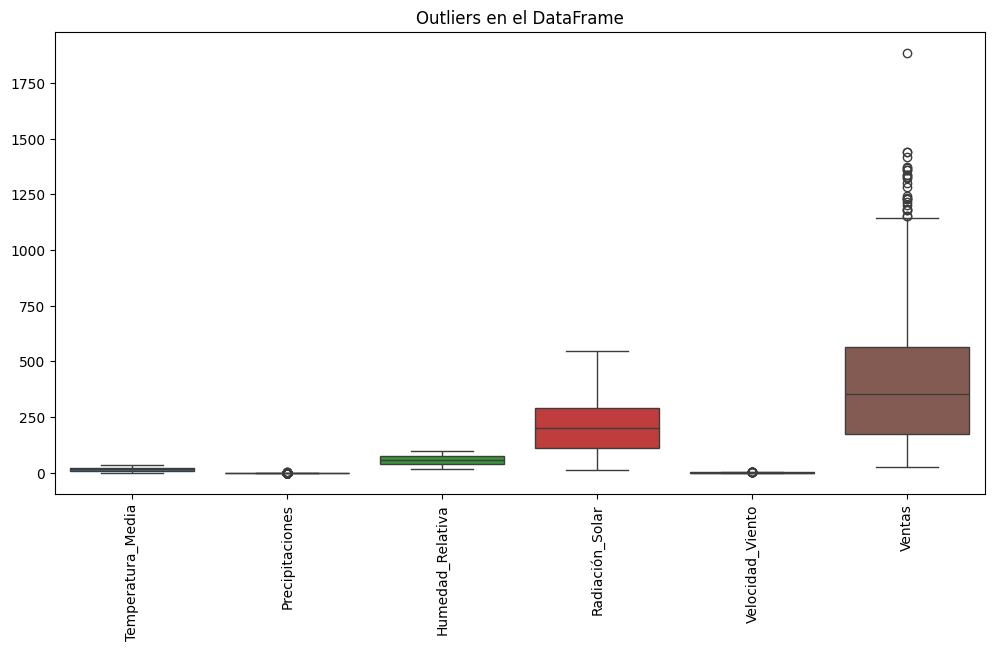

In [40]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df.any(axis=1)])
plt.xticks(rotation=90)
plt.title("Outliers en el DataFrame")
plt.show()

In [41]:
# Detectar valores Outliers. Seleccionar solo columnas numéricas.
df_numericas = df.select_dtypes(include=[np.number])

def detectar_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
    return outliers

outliers_iqr = detectar_outliers_iqr(df_numericas)

print("Número de outliers por columna (IQR):")
print(outliers_iqr.sum())



Número de outliers por columna (IQR):
Temperatura_Media      0
Precipitaciones      225
Humedad_Relativa       0
Radiación_Solar        0
Velocidad_Viento      25
Ventas                25
dtype: int64


In [42]:
corr = df.corr()
corr

,Fecha,Temperatura_Media,Precipitaciones,Humedad_Relativa,Radiación_Solar,Velocidad_Viento,Ventas
Fecha,1.000000,-0.011247,0.022691,0.093466,-0.103532,-0.195570,-0.048626
Temperatura_Media,-0.011247,1.000000,-0.050035,-0.728663,0.748526,0.253168,0.557412
Precipitaciones,0.022691,-0.050035,1.000000,0.284243,-0.200984,0.111634,-0.075630
Humedad_Relativa,0.093466,-0.728663,0.284243,1.000000,-0.816949,-0.147404,-0.480300
Radiación_Solar,-0.103532,0.748526,-0.200984,-0.816949,1.000000,0.240969,0.598620
Velocidad_Viento,-0.195570,0.253168,0.111634,-0.147404,0.240969,1.000000,0.134262
Ventas,-0.048626,0.557412,-0.075630,-0.480300,0.598620,0.134262,1.000000


Text(0.5, 1.0, 'Distribución de Ventas')

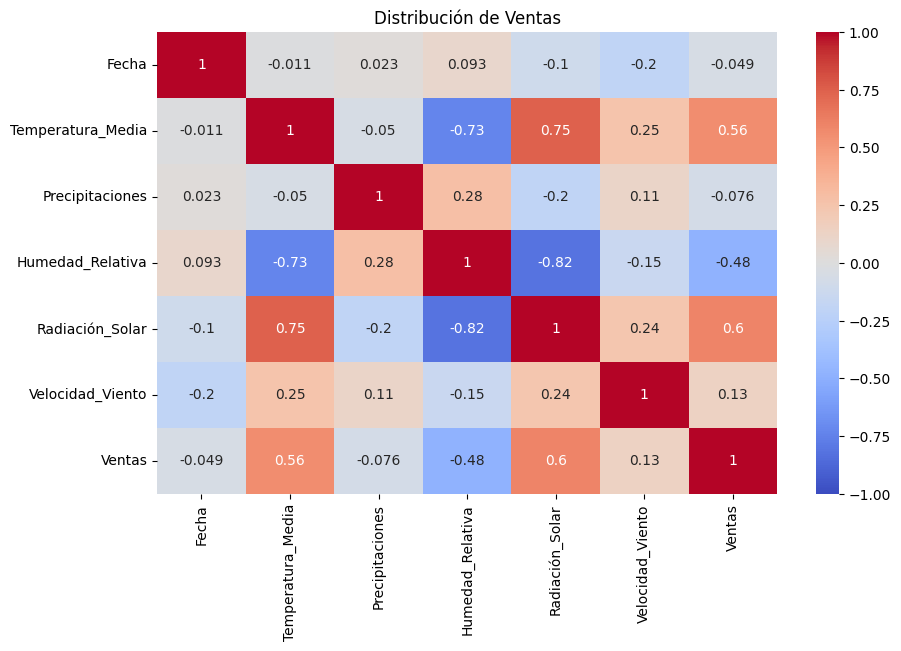

In [43]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.title("Distribución de Ventas")

####  La variable 'target' tiene mayor correlación positiva con la variable predictora 'Temperatura_Media' y mayor correlación negativa con la variable 'Humedad_Relativa'

In [44]:
#Verificar la cantidad de datos que tengo en el df
print(df.shape)

(1244, 7)


In [45]:
#Verifico la información de las columnas
print(df.columns)

Index(['Fecha', 'Temperatura_Media', 'Precipitaciones', 'Humedad_Relativa',
       'Radiación_Solar', 'Velocidad_Viento', 'Ventas'],
      dtype='object')


In [46]:
#Definir variables X(features), y(target)
X = df[['Temperatura_Media', 'Humedad_Relativa']]
y = df['Ventas']

In [47]:
#Dividir los datos en cunjunto de Train y conjunto de Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(995, 2)
(249, 2)
(995,)
(249,)


In [49]:
#Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### Regresion Lineal

In [50]:
#Iniciar modelo
modelo_1 = LinearRegression()

In [51]:
#Entrenar modelo en el conjunto de entrenamiento
modelo_1.fit(X_train, y_train)

LinearRegression()

In [52]:
#Realizar predicción en el conjunto de pruebas.
y_pred_modelo_1 = modelo_1.predict(X_test)
y_pred_modelo_1

array([703.72580678, 481.90572094, 428.96205759, 615.5018668 ,
       467.80995305, 446.44317034, 459.23784539, 525.90392441,
       633.10114819, 446.44317034, 602.81655614, 346.59867524,
       518.47680877, 598.5487297 , 689.17497284, 543.27567277,
       441.638564  , 402.86357812, 456.68972304, 500.11469182,
       259.78519248, 366.63671459, 256.16351033, 704.75410753,
       488.57585054, 271.20586511, 235.67040492, 188.46913055,
       634.39343676, 153.23411298, 473.06962545, 149.53952124,
       353.30525964, 439.66367635, 210.68194005, 219.86373721,
       507.5038753 , 296.15787518, 376.19186395, 231.52074713,
       470.47624404, 578.31961211, 713.36266999, 223.89522636,
       192.01790312, 269.00344443, 351.21220335, 403.47326761,
       406.1395586 , 237.57238298, 432.53848069, 411.39923099,
       471.65916823, 442.63040995, 264.89024143, 544.07644049,
       211.81960518, 442.10243431, 379.39493485, 438.0621409 ,
       165.08220113, 235.06071543, 226.33398432, 285.07

In [53]:
#Evaluación
mae_modelo_1 = mean_absolute_error(y_test, y_pred_modelo_1)
rmse_modelo_1 = np.sqrt(mean_squared_error(y_test, y_pred_modelo_1))
r2_modelo_1 = r2_score(y_test, y_pred_modelo_1)

print(f'Regresión Lineal - MAE: {mae_modelo_1}, RMSE: {rmse_modelo_1}, R²: {r2_modelo_1}')

Regresión Lineal - MAE: 164.04519814831244, RMSE: 223.31725061154168, R²: 0.312810775288741


### Random Forest Regressor

In [54]:
#Inicializar modelo
modelo_2 = RandomForestRegressor(n_estimators=100, random_state=42)

In [55]:
#Entrenar modelo
modelo_2.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [56]:
#Predicciones
y_pred_modelo_2 = modelo_2.predict(X_test)
y_pred_modelo_2

array([ 436.43070833,  595.80338   ,  396.24879167,  634.97847333,
        584.9839    ,  491.36928333,  544.33139167,  669.16921984,
        530.08453333,  491.36928333,  754.01950667,  217.71496   ,
        571.07792421,  708.76062   ,  851.40239167,  885.39860833,
        389.94005   ,  341.8911    ,  351.6796    ,  612.72265   ,
        195.0631    ,  290.48266167,  213.0434    ,  456.221725  ,
        806.15945   ,  178.141175  ,  153.77823464,  144.67935   ,
        436.22915   ,   99.780775  ,  399.841     ,  205.9349    ,
        334.7762    ,  608.067155  ,   83.772     ,  161.45355   ,
        545.06722667,  215.70302833,  568.10398   ,  163.34284   ,
        526.75861667,  648.34718048,  506.40117095,  148.92750476,
        133.85905   ,  355.45595   ,  594.75405833,  499.61606667,
        318.57808   ,  139.0232    ,  321.1428    ,  760.49419333,
        823.1242    ,  529.41196667,  364.87335   ,  737.89243833,
        182.88335   ,  488.19415   ,  585.90042667,  232.1367 

In [57]:
#Evaluación
mae_modelo_2 = mean_absolute_error(y_test, y_pred_modelo_2)
rmse_modelo_2 = np.sqrt(mean_squared_error(y_test, y_pred_modelo_2))
r2_modelo_2 = r2_score(y_test, y_pred_modelo_2)

print(f'Random Forest - MAE: {mae_modelo_2}, RMSE: {rmse_modelo_2}, R²: {r2_modelo_2}')

Random Forest - MAE: 195.37956491936004, RMSE: 273.41518136855433, R²: -0.03009444817627993


### Gradient Boosting (XGBoost o LightGBM)

In [58]:
#Inicializar modelo
modelo_3 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

In [59]:
#Entrenar modelo
modelo_3.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [60]:
#Predicciones
y_pred_modelo_3 = modelo_3.predict(X_test)
y_pred_modelo_3

array([481.53192407, 490.87496589, 341.42003405, 635.06890715,
       526.7946308 , 575.91966877, 507.29829123, 573.48756837,
       603.28843461, 575.91966877, 653.59897155, 357.39548179,
       572.98038179, 650.60650659, 604.21199614, 625.48716457,
       446.72317628, 445.10651991, 416.15710853, 538.06442484,
       250.3860237 , 350.5603582 , 216.04382439, 490.83936131,
       637.93768355, 222.08492903, 159.68403787, 140.73620202,
       543.22882266, 133.90594531, 488.67111663, 141.99268805,
       521.06566319, 485.65760515, 147.70972614, 199.876257  ,
       554.48046105, 253.06481244, 500.3863656 , 226.15924733,
       532.4827621 , 590.21679881, 623.11291375, 167.71037634,
       202.07332761, 271.06701026, 506.01569843, 402.19778201,
       429.51816874, 171.80646496, 416.15710853, 449.58334999,
       522.24055368, 498.00692553, 318.96561571, 612.74885534,
       164.09683256, 479.96477856, 435.63697489, 416.15710853,
       154.40927824, 177.80356178, 143.58989444, 258.69

In [61]:
#Evaluación
mae_modelo_3 = mean_absolute_error(y_test, y_pred_modelo_3)
rmse_modelo_3 = np.sqrt(mean_squared_error(y_test, y_pred_modelo_3))
r2_modelo_3 = r2_score(y_test, y_pred_modelo_3)

print(f'Random Forest - MAE: {mae_modelo_3}, RMSE: {rmse_modelo_3}, R²: {r2_modelo_3}')

Random Forest - MAE: 169.3072982039572, RMSE: 232.25502070212306, R²: 0.2567036189713261


### Support Vector Regression (SVR)

In [62]:
#Inicializar modelo
modelo_4 = SVR(kernel='rbf', C=100, epsilon=0.1)

In [63]:
#Entrenar modelo
modelo_4.fit(X_train_scaled, y_train)

SVR(C=100)

In [64]:
#Predicciones
y_pred_modelo_4 = modelo_4.predict(X_test_scaled)
y_pred_modelo_4

array([463.11426017, 530.15006212, 398.13673547, 567.06916436,
       516.88783778, 454.33493572, 504.21069502, 576.45277521,
       548.98010834, 454.33493572, 579.05244165, 303.3454302 ,
       567.83020186, 589.78473315, 479.11655074, 587.43167827,
       485.55624543, 391.50257911, 475.72794647, 551.08839192,
       184.45478435, 334.40065139, 171.97945835, 461.27962843,
       492.20719438, 157.4747351 , 150.54407402, 119.39570915,
       541.32226479, 147.33011855, 504.06129767, 151.64897298,
       326.23532442, 436.41236217, 134.52405107, 151.34636572,
       556.54426522, 204.54367069, 358.48165157, 171.85142291,
       519.320144  , 578.38121846, 447.19527977, 117.86380035,
       140.58102672, 190.49311734, 363.10313236, 391.61132838,
       397.00420762, 148.66609456, 437.66818758, 403.53003555,
       512.06010773, 485.02814145, 202.15274687, 578.50879373,
       111.942044  , 432.42790158, 386.14762707, 445.43234373,
       144.18946851, 150.6227158 , 129.92261045, 201.43

In [65]:

#Evaluación
mae_modelo_4 = mean_absolute_error(y_test, y_pred_modelo_4)
rmse_modelo_4 = np.sqrt(mean_squared_error(y_test, y_pred_modelo_4))
r2_modelo_4 = r2_score(y_test, y_pred_modelo_4)

print(f'Random Forest - MAE: {mae_modelo_4}, RMSE: {rmse_modelo_4}, R²: {r2_modelo_4}')

Random Forest - MAE: 154.8904817757061, RMSE: 220.7165465755749, R²: 0.3287232876935442


### Red Neuronal (MLPRegressor)

In [66]:
#Inicializar Modelo
modelo_5 = MLPRegressor(hidden_layer_sizes=(50, 50), activation='relu', solver='adam', max_iter=500, random_state=42)

In [67]:
#Entrenar modelo
modelo_5.fit(X_train_scaled, y_train)

c:\Users\rfg2m\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42)

In [68]:
#Predicciones
y_pred_modelo_5 = modelo_5.predict(X_test_scaled)
y_pred_modelo_5

array([646.25691033, 568.66051487, 461.16799975, 598.42597494,
       578.16626125, 518.98928191, 581.12552573, 585.58329891,
       605.19508855, 518.98928191, 595.09110036, 405.79457616,
       589.53010638, 611.46532481, 627.90297731, 578.36704523,
       549.78835728, 505.87034174, 531.68085618, 573.09045357,
       264.45645626, 446.47094191, 239.76953663, 649.7408316 ,
       520.78195231, 253.35563159, 211.77413622, 171.00384017,
       644.81201554, 151.09646419, 543.12831964, 145.82113316,
       431.47736875, 500.42492922, 179.85831499, 205.00192771,
       589.31563133, 286.93270565, 421.76183077, 226.38261771,
       582.79492886, 622.215182  , 661.40065072, 191.69377358,
       176.29977736, 278.12219881, 433.57204897, 505.55041914,
       510.17908675, 199.28404416, 520.33275718, 475.14114515,
       555.9689406 , 560.69940783, 277.07258437, 567.86559919,
       185.16206064, 491.06822954, 448.45159207, 521.42782129,
       142.6630145 , 209.4393369 , 185.17318633, 275.74

In [69]:
#Evaluación
mae_modelo_5 = mean_absolute_error(y_test, y_pred_modelo_5)
rmse_modelo_5 = np.sqrt(mean_squared_error(y_test, y_pred_modelo_5))
r2_modelo_5 = r2_score(y_test, y_pred_modelo_5)

print(f'Random Forest - MAE: {mae_modelo_5}, RMSE: {rmse_modelo_5}, R²: {r2_modelo_5}')

Random Forest - MAE: 168.3394394641893, RMSE: 219.57208284370975, R²: 0.3356666735515169


### Comparación de modelos

In [70]:
resultados = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Random Forest', 'Gradient Boosting', 'SVR', 'Red Neuronal'],
    'MAE': [mae_modelo_1, mae_modelo_2, mae_modelo_3, mae_modelo_4, mae_modelo_5],
    'RMSE': [rmse_modelo_1, rmse_modelo_2, rmse_modelo_3, rmse_modelo_4, rmse_modelo_5],
    'R²': [r2_modelo_1, r2_modelo_2, r2_modelo_3, r2_modelo_4, r2_modelo_5]
})

print(resultados.sort_values(by='RMSE'))

              Modelo         MAE        RMSE        R²
4       Red Neuronal  168.339439  219.572083  0.335667
3                SVR  154.890482  220.716547  0.328723
0   Regresión Lineal  164.045198  223.317251  0.312811
2  Gradient Boosting  169.307298  232.255021  0.256704
1      Random Forest  195.379565  273.415181 -0.030094


##### Mejor modelo inicial: Red Neuronal

1. Tiene el menor RMSE (219.57), lo que indica que en términos de precisión general es el mejor modelo hasta ahora.
2. Su MAE (168.34) también es el más bajo.
3. Su R² (0.3357) sugiere que solo explica el 33.6% de la variabilidad de las ventas, por lo que hay margen de mejora.

##### SVR está cerca de la Red Neuronal

1. Menor MAE (154.89), lo que indica que en promedio hace predicciones más precisas.
2. Sin embargo, su RMSE (220.72) y R² (0.3287) están ligeramente por debajo.
3. Puede mejorar bastante con ajuste de hiperparámetros.

##### Regresión Lineal no está muy lejos

1. Tiene un rendimiento decente, con RMSE de 223.32.
2. Esto sugiere que las relaciones lineales en los datos son relativamente fuertes.
3. Sin embargo, podría beneficiarse de ingeniería de características o transformación de variables.

##### Gradient Boosting no está funcionando bien

1. Tiene un RMSE más alto (232.26) y un R² bajo (0.2567).
2. Esto indica que no está capturando bien la estructura de los datos en su configuración actual.

##### Random Forest es el peor modelo sin optimización

1. RMSE altísimo (273.42), lo que indica que sus predicciones son muy imprecisas.
2. R² negativo (-0.03) significa que predice peor que simplemente usar la media de las ventas.
3. Esto sugiere que está sobreajustando el entrenamiento o que necesita mejor ajuste de hiperparámetros.


#### Recomendaciones

1. Optimizar los hiperparámetros de los modelos, especialmente Random Forest y Gradient Boosting.
2. Probar más ingeniería de características, como:
Variables de estacionalidad (verano/invierno).
Efectos no lineales (interacción humedad-temperatura).
3. Evaluar la escala de las variables para los modelos que dependen de ella (SVR y Red Neuronal).

### Hiperparámetros utilizando GridSearchCV para los modelos: Random Forest, Gradient Boosting, SVR y MLPRegressor

In [71]:
# Configuración general de GridSearchCV
def optimizar_modelo(modelo, parametros, X_train, y_train):
    grid = GridSearchCV(modelo, parametros, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1, error_score='raise')
    grid.fit(X_train, y_train)

    print(f'Mejores parámetros para {modelo.__class__.__name__}: {grid.best_params_}')
    print(f'Mejor RMSE: {np.sqrt(-grid.best_score_)}')

    return grid.best_estimator_

### Optimización de Random Forest

In [72]:
parametros_modelo_2 = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

mejor_modelo_2 = optimizar_modelo(RandomForestRegressor(random_state=42), parametros_modelo_2, X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Mejores parámetros para RandomForestRegressor: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Mejor RMSE: 245.30163826009738


### Optimización de Gradient Boosting

In [73]:
parametros_modelo_3 = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10] 
}

mejor_modelo_3 = optimizar_modelo(GradientBoostingRegressor(random_state=42), parametros_modelo_3, X_train_scaled, y_train ) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Mejores parámetros para GradientBoostingRegressor: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Mejor RMSE: 238.4140651566884


In [74]:
mejor_modelo_3.predict([[23, 16]])

array([878.34756244])

In [75]:
scaler.transform([[23, 16]])

c:\Users\rfg2m\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 1.04565752, -2.25981498]])

In [76]:
mejor_modelo_3

GradientBoostingRegressor(learning_rate=0.01, n_estimators=200, random_state=42)

In [77]:
pickle.dump(mejor_modelo_3, open("modelo_final.pkl", "wb"))

In [78]:
pickle.dump(scaler, open("scaler_modelo_final.pklscaler_modelo_final.pkl", "wb"))

### Optimización de SVR

In [79]:
# Se requiere que los datos estén escalados por lo que se utiliza X_train_scaled
parametros_modelo_4 = {
    'C': [1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5],
    'kernel': ['linear', 'rbf']
}

mejor_modelo_4 = optimizar_modelo(SVR(), parametros_modelo_4, X_train_scaled, y_train)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Mejores parámetros para SVR: {'C': 100, 'epsilon': 0.5, 'kernel': 'rbf'}
Mejor RMSE: 240.82640688915768


### Optimización de MLPRegressor (Red Neuronal)

In [80]:
parametros_modelo_5 = {
    'hidden_layer_sizes': [(50,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001],
    'learning_rate_init': [0.0001, 0.001],
    'max_iter': [1500]

}

mejor_modelo_5 = optimizar_modelo(MLPRegressor(max_iter=500, random_state=42), parametros_modelo_5, X_train_scaled, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Mejores parámetros para MLPRegressor: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.001, 'max_iter': 1500, 'solver': 'adam'}
Mejor RMSE: 233.4431503060841


### Evaluación de los modelos optimizados

In [81]:
#Ahora que tenemos los mejores modelos, los probamos en el conjunto de prueba
mejores_modelos = {
    'Random Forest': mejor_modelo_2,
'Gradient Boosting': mejor_modelo_3,
'SVR': mejor_modelo_4,
'MLPRegressor': mejor_modelo_5
}

resultados = []
for nombre, modelo in mejores_modelos.items():
    if nombre in ['SVR', 'MLPRegressor']:
        y_pred = modelo.predict(X_test)
    else:
        y_pred = modelo.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    resultados.append({'Modelo': nombre, 'MAE': mae, 'RMSE': rmse, 'R²': r2})

df_resultados = pd.DataFrame(resultados).sort_values(by='RMSE')
print(df_resultados)


              Modelo          MAE         RMSE          R²
0      Random Forest   175.701598   237.800522    0.220785
2                SVR   208.092449   275.386642   -0.045003
1  Gradient Boosting   517.449536   564.989789   -3.398585
3       MLPRegressor  2714.525944  2773.788583 -105.017732


c:\Users\rfg2m\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
c:\Users\rfg2m\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
c:\Users\rfg2m\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


#### Problemas Detectados

1. MLPRegressor tiene un rendimiento muy malo:

RMSE y MAE extremadamente altos, sugiriendo que no ha aprendido nada útil.
R2 de -105, lo que indica que el modelo es peor que simplemente predecir la media.
Posibles causas:
Datos no escalados correctamente.
Mala selección de hiperparámetros (capas ocultas muy grandes o learning_rate_init alto).
Falta de convergencia (necesita más iteraciones o un mejor solver).

2. Advertencias en SVR y MLPRegressor sobre nombres de características

Indica que los modelos fueron entrenados sin nombres de columnas, lo que puede causar problemas en la predicción.
Solución: Asegurar que X_train y X_test sean DataFrame en lugar de arrays de NumPy.

#### El mejor modelo es el Gradient Boosting

Aunque sea el mejor modelo, no significa que sea bueno, porque el R2 es muy bajo y el error muy alto. Se puede mejorar con Feature Engineering y ajuste de hiperparámetros, luego reentrenarlo.

##### Evaluación del Desempeño
¿Es un buen modelo?

1. MAE y RMSE indican errores relativamente altos.
2. R2 de 0.29 es bajo → El modelo explica solo el 29% de la variabilidad en las ventas.

¿Es mejor que un modelo aleatorio?

1. Sí, porque R2>0 indica que el modelo es mejor que simplemente predecir la media.
Sin embargo, un R2 de 0.29 es bajo, lo que sugiere que el modelo no captura bien la relación entre variables climáticas y ventas.

¿Cómo mejorar el modelo?

Feature Engineering:
✅ Incluir variables de fines de semana y festivos (la demanda de helados varía).
✅ Agregar estaciones del año como variable categórica.
✅ Crear la "Temperatura Ajustada por Viento" y la interacción Humedad-Temperatura que mencionaste antes.
Optimizar Hiperparámetros:
✅ Ajustar n_estimators, max_depth, learning_rate en Gradient Boosting.
Probar otros Modelos:
✅ XGBoost o LightGBM pueden superar a Gradient Boosting.
